# Analysis of New York Motor Vehicle Collisions


# Data Importing, Auditing & Binning

In [111]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xlrd
import matplotlib.style


# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default')
#matplotlib.style.use('default')

#matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [112]:
df = pd.read_csv("/Users/sandippalit/downloads/NYPD_Motor_Vehicle_Collisions.csv",parse_dates=['DATE'])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
# Addind Day of the Week column

df['DAY OF WEEK'] = df.DATE.map(lambda x: x.strftime("%A"))

In [7]:
# Adding Month column

def month(x):
    return ['', 'January','February', 'March', 'April', 'May', 'June', 
       'July', 'August', 'September', 'October', 'November', 'December'][x.month]

df['MONTH'] = df['DATE'].map(month)

In [8]:
# Binning Time of the Day

def convert_to_integerinteger(time):
    return int(time.replace(":", ""))

ranges = [0,600,1200,1800,2400]
labels = ['Early Morning','Morning','Early Afternoon','Evening']
df['TIMEBRACKET'] = pd.cut(df.TIME.map(convert_to_integerinteger), ranges, labels=labels).astype('category')

In [9]:
# Added column only for the sake of summing up no. of incidents when grouping

list = []
for n in range(len(df)):
    list.append(1)
df["INCIDENTS"] = list

In [10]:
df2=df.rename(columns={df.columns[3] : "ZIP_Code",df.columns[7]:"ON_STREET_NAME",df.columns[8]:
                      "CROSS_STREET_NAME",df.columns[9]:"OFF_STREET_NAME",df.columns[10]:"NO_OF_PERSONS_INJURED",
                      df.columns[11]:"NO_OF_PERSONS_KILLED",df.columns[12]:"NO_OF_PEDESTRIANS_INJURED",
                      df.columns[13]:"No_OF_PEDESTRIANS_KILLED",df.columns[14]:"NO_OF_CYCLIST_INJURED",
                      df.columns[15]:"NO_OF_CYCLIST_KILLED",df.columns[16]:"NO_OF_MOTORIST_INJURED",
                      df.columns[17]:"NO_OF_MOTORIST_KILLED",df.columns[18]:"CONTRIBUTING_FACTOR_1",
                      df.columns[19]:"CONTRIBUTING_FACTOR_2",df.columns[20]:"CONTRIBUTING_FACTOR_3",
                      df.columns[21]:"CONTRIBUTING_FACTOR_4",df.columns[22]:"CONTRIBUTING_FACTOR_5",
                      df.columns[23]:"UNIQUE_KEY",df.columns[24]:"VEHICLE_TYPE_CODE1",df.columns[25]:
                      "VEHICLE_TYPE_CODE2",df.columns[26]:"VEHICLE_TYPE_CODE3",df.columns[27]:"VEHICLE_TYPE_CODE4",
                      df.columns[28]:"VEHICLE_TYPE_CODE5",df.columns[29]:"DAY_OF_WEEK",df.columns[30]:"MONTH",
                       df.columns[31]:"TIMEBRACKET",df.columns[32]:"INCIDENTS"})
                     

In [11]:
df2.head()

,DATE,TIME,BOROUGH,ZIP_Code,LATITUDE,LONGITUDE,LOCATION,ON_STREET_NAME,CROSS_STREET_NAME,OFF_STREET_NAME,...,UNIQUE_KEY,VEHICLE_TYPE_CODE1,VEHICLE_TYPE_CODE2,VEHICLE_TYPE_CODE3,VEHICLE_TYPE_CODE4,VEHICLE_TYPE_CODE5,DAY_OF_WEEK,MONTH,TIMEBRACKET,INCIDENTS
0,2018-02-11,0:00,BRONX,10473,40.825966,-73.862175,"(40.825966, -73.862175)",LELAND AVENUE,BRUCKNER BOULEVARD,NaN,...,3844320,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN,Sunday,February,NaN,1
1,2018-02-11,0:00,BROOKLYN,11203,40.644432,-73.929600,"(40.644432, -73.9296)",UTICA AVENUE,CLARENDON ROAD,NaN,...,3844774,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,Sunday,February,NaN,1
2,2018-02-11,0:00,BROOKLYN,11209,40.621490,-74.026220,"(40.62149, -74.02622)",86 STREET,5 AVENUE,NaN,...,3844969,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,Sunday,February,NaN,1
3,2018-02-11,0:00,BROOKLYN,11237,40.706364,-73.922554,"(40.706364, -73.922554)",NaN,NaN,24 WYCKOFF AVENUE,...,3844183,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN,Sunday,February,NaN,1
4,2018-02-11,0:00,MANHATTAN,10032,40.839172,-73.943474,"(40.839172, -73.943474)",WEST 164 STREET,FORT WASHINGTON AVENUE,NaN,...,3844245,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,Sunday,February,NaN,1


In [12]:
df2.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP_Code', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'ON_STREET_NAME', 'CROSS_STREET_NAME', 'OFF_STREET_NAME',
       'NO_OF_PERSONS_INJURED', 'NO_OF_PERSONS_KILLED',
       'NO_OF_PEDESTRIANS_INJURED', 'No_OF_PEDESTRIANS_KILLED',
       'NO_OF_CYCLIST_INJURED', 'NO_OF_CYCLIST_KILLED',
       'NO_OF_MOTORIST_INJURED', 'NO_OF_MOTORIST_KILLED',
       'CONTRIBUTING_FACTOR_1', 'CONTRIBUTING_FACTOR_2',
       'CONTRIBUTING_FACTOR_3', 'CONTRIBUTING_FACTOR_4',
       'CONTRIBUTING_FACTOR_5', 'UNIQUE_KEY', 'VEHICLE_TYPE_CODE1',
       'VEHICLE_TYPE_CODE2', 'VEHICLE_TYPE_CODE3', 'VEHICLE_TYPE_CODE4',
       'VEHICLE_TYPE_CODE5', 'DAY_OF_WEEK', 'MONTH', 'TIMEBRACKET',
       'INCIDENTS'],
      dtype='object')

In [13]:
# Auditing the Dataset for content completeness

df2.count()

DATE                         1208810
TIME                         1208810
BOROUGH                       865040
ZIP_Code                      864946
LATITUDE                      993917
LONGITUDE                     993917
LOCATION                      993917
ON_STREET_NAME                972779
CROSS_STREET_NAME             910081
OFF_STREET_NAME               188349
NO_OF_PERSONS_INJURED        1208810
NO_OF_PERSONS_KILLED         1208810
NO_OF_PEDESTRIANS_INJURED    1208810
No_OF_PEDESTRIANS_KILLED     1208810
NO_OF_CYCLIST_INJURED        1208810
NO_OF_CYCLIST_KILLED         1208810
NO_OF_MOTORIST_INJURED       1208810
NO_OF_MOTORIST_KILLED        1208810
CONTRIBUTING_FACTOR_1        1202870
CONTRIBUTING_FACTOR_2        1042284
CONTRIBUTING_FACTOR_3          78355
CONTRIBUTING_FACTOR_4          16853
CONTRIBUTING_FACTOR_5           4169
UNIQUE_KEY                   1208810
VEHICLE_TYPE_CODE1           1199431
VEHICLE_TYPE_CODE2           1011260
VEHICLE_TYPE_CODE3             75942
V

# Analysis of Relationship between vehicles and collisions

In [28]:
# Dropping the Rows with Null Values in Vehicle type code column
vehicles_df = df2.dropna(subset=["VEHICLE_TYPE_CODE1"])

vehicles_df.count()



DATE                         1199431
TIME                         1199431
BOROUGH                       858439
ZIP_Code                      858345
LATITUDE                      986141
LONGITUDE                     986141
LOCATION                      986141
ON_STREET_NAME                966324
CROSS_STREET_NAME             904873
OFF_STREET_NAME               185407
NO_OF_PERSONS_INJURED        1199431
NO_OF_PERSONS_KILLED         1199431
NO_OF_PEDESTRIANS_INJURED    1199431
No_OF_PEDESTRIANS_KILLED     1199431
NO_OF_CYCLIST_INJURED        1199431
NO_OF_CYCLIST_KILLED         1199431
NO_OF_MOTORIST_INJURED       1199431
NO_OF_MOTORIST_KILLED        1199431
CONTRIBUTING_FACTOR_1        1194923
CONTRIBUTING_FACTOR_2        1038405
CONTRIBUTING_FACTOR_3          78252
CONTRIBUTING_FACTOR_4          16829
CONTRIBUTING_FACTOR_5           4162
UNIQUE_KEY                   1199431
VEHICLE_TYPE_CODE1           1199431
VEHICLE_TYPE_CODE2           1011260
VEHICLE_TYPE_CODE3             75942
V

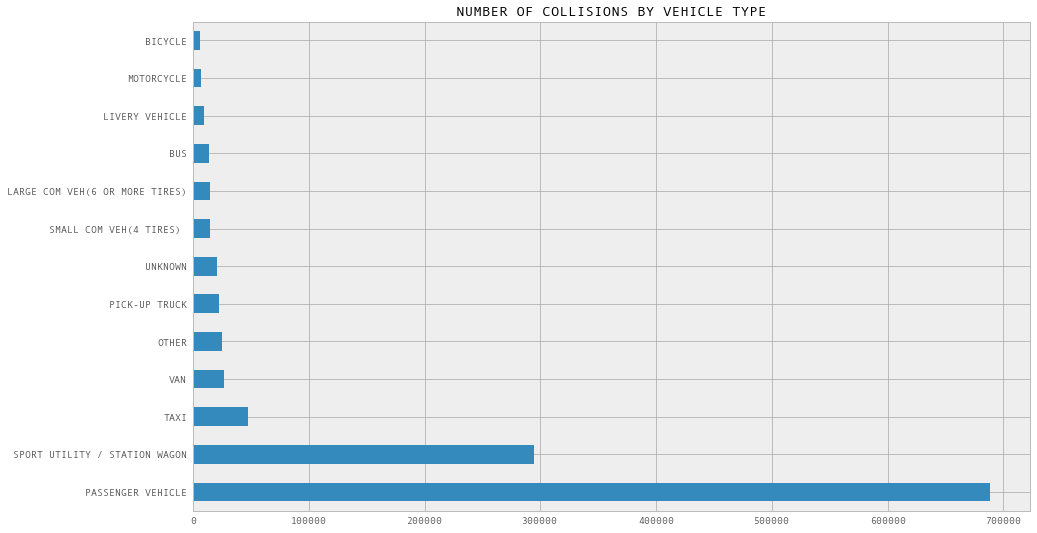

In [34]:
vehicles_df.VEHICLE_TYPE_CODE1.value_counts()[vehicles_df.VEHICLE_TYPE_CODE1.value_counts()>5000].plot(kind='barh', figsize = (15,9))
plt.title("NUMBER OF COLLISIONS BY VEHICLE TYPE")

plt.savefig("/Users/sandippalit/downloads/png1.png")

** _Passenger vehicle_ is by far the _most involved_ of all vehicle types in the collisions. **

In [24]:
vehicles_most_accidents = vehicles1.sort_values(['TOTAL_ACCIDENTS'],ascending=False)
vehicles_most_accidents.head(10)

,NO_OF_PERSONS_INJURED,NO_OF_PERSONS_KILLED,KILLED_TO_INJURED_PERCENT,TOTAL_ACCIDENTS
VEHICLE_TYPE_CODE1,,,,
PASSENGER VEHICLE,177833,604,0.339644,178437
SPORT UTILITY / STATION WAGON,74126,314,0.423603,74440
TAXI,12177,32,0.262791,12209
UNKNOWN,7735,61,0.788623,7796
VAN,5579,38,0.681126,5617
OTHER,4793,26,0.542458,4819
BICYCLE,4662,31,0.664951,4693
MOTORCYCLE,3915,125,3.192848,4040
PICK-UP TRUCK,3963,27,0.681302,3990


In [31]:
vehicles1= vehicles_df.groupby("VEHICLE_TYPE_CODE1")["NO_OF_PERSONS_INJURED","NO_OF_PERSONS_KILLED"].sum()
vehicles1['KILLED_TO_INJURED_PERCENT'] = vehicles1.NO_OF_PERSONS_KILLED/vehicles1.NO_OF_PERSONS_INJURED * 100

vehicle_dangerous = vehicles1.sort_values(['KILLED_TO_INJURED_PERCENT'],ascending=False).head(10)
vehicle_dangerous

,NO_OF_PERSONS_INJURED,NO_OF_PERSONS_KILLED,KILLED_TO_INJURED_PERCENT
VEHICLE_TYPE_CODE1,,,
FB,30,10,33.333333
LL,8,1,12.500000
TT,9,1,11.111111
MD,12,1,8.333333
MOTORCYCLE,3915,125,3.192848
LARGE COM VEH(6 OR MORE TIRES),1717,50,2.912056
DS,118,3,2.542373
DP,47,1,2.127660
VN,50,1,2.000000


** _Motorcycle_ collisions are most fatal. The collisions involving motorcycle has _highest_ number of _death to injured_ ratio.** ** Interestingly, Bicycles are more than four times less fatal than Motorcycles. **

# Analysis of  Collisions by Locations

## Analysis by Boroughs

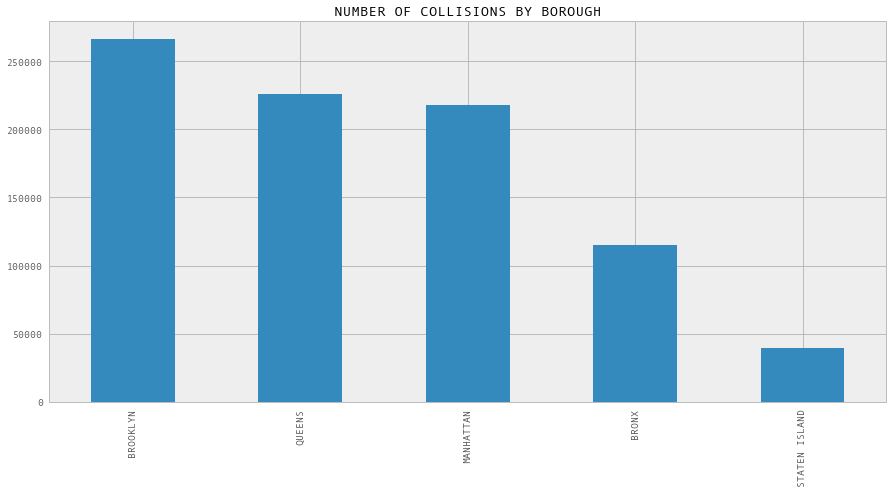

In [54]:
locations=df2[df2.BOROUGH.notnull()]
locations.BOROUGH.value_counts().plot(kind='bar', figsize = (15,7))
plt.title("NUMBER OF COLLISIONS BY BOROUGH")
plt.savefig("/Users/sandippalit/downloads/png4.png")

** Brooklyn has highest number of collisions among  boroughs , closely followed by Queens **

## Breakdown, by boroughs, of different groups killed in collisions 

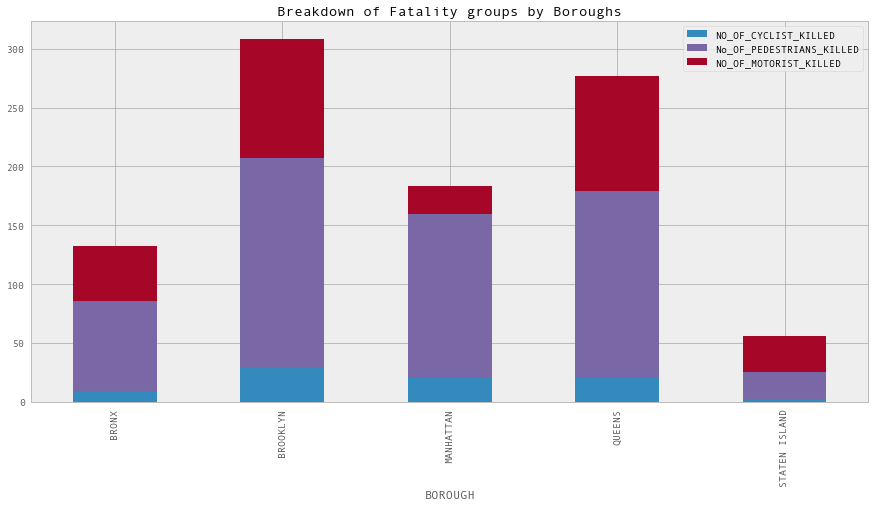

In [55]:
locations.groupby("BOROUGH")[["NO_OF_CYCLIST_KILLED","No_OF_PEDESTRIANS_KILLED",
                       "NO_OF_MOTORIST_KILLED"]].sum().plot(kind='bar',stacked='True', figsize = (15,7))
plt.title("Breakdown of Fatality groups by Boroughs")

plt.savefig("/Users/sandippalit/downloads/png5.png")

In [56]:
locations.groupby("BOROUGH")[["NO_OF_CYCLIST_KILLED","No_OF_PEDESTRIANS_KILLED",
                       "NO_OF_MOTORIST_KILLED"]].sum()

,NO_OF_CYCLIST_KILLED,No_OF_PEDESTRIANS_KILLED,NO_OF_MOTORIST_KILLED
BOROUGH,,,
BRONX,9,77,46
BROOKLYN,30,177,101
MANHATTAN,20,140,23
QUEENS,20,159,98
STATEN ISLAND,2,23,31


## Analysis of Collisions by Cross Streets

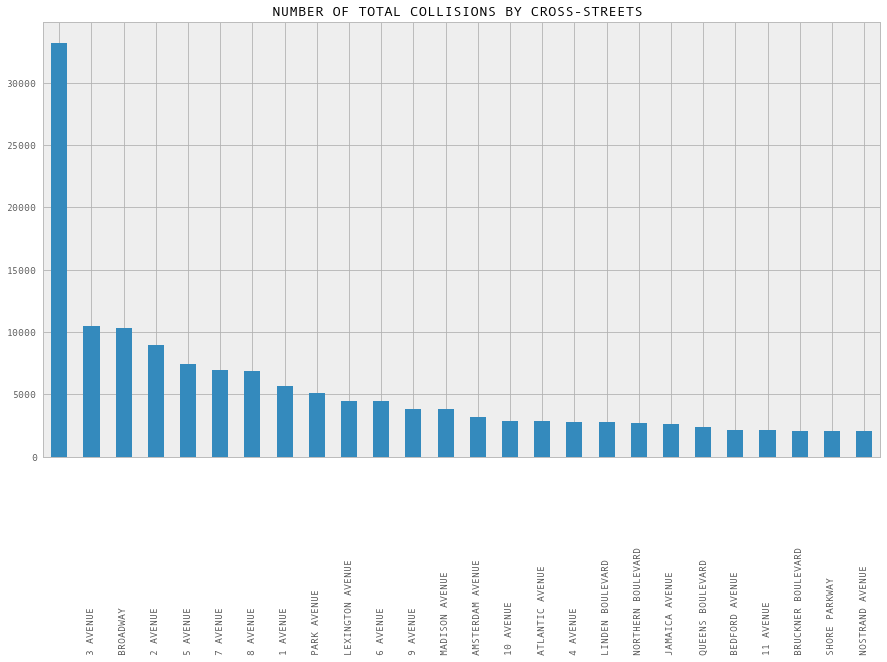

In [57]:
df2.CROSS_STREET_NAME.value_counts()[df2.CROSS_STREET_NAME.value_counts()>2000].plot(kind='bar', figsize = (15,8))
plt.title("NUMBER OF TOTAL COLLISIONS BY CROSS-STREETS ")

plt.savefig("/Users/sandippalit/downloads/png6.png")

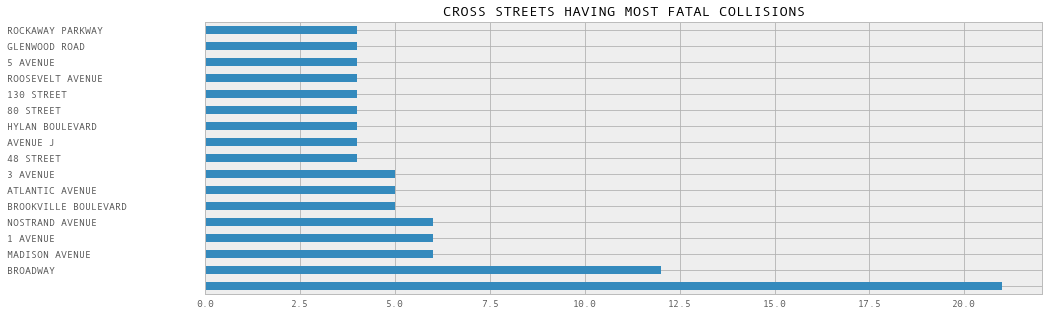

In [61]:
df2.CROSS_STREET_NAME[df2.NO_OF_PERSONS_KILLED >0 ].value_counts()[df2.CROSS_STREET_NAME[df2.NO_OF_PERSONS_KILLED >0].value_counts()>3].plot(kind='barh')
plt.title("CROSS STREETS HAVING MOST FATAL COLLISIONS")
plt.savefig("/Users/sandippalit/downloads/png7.png")

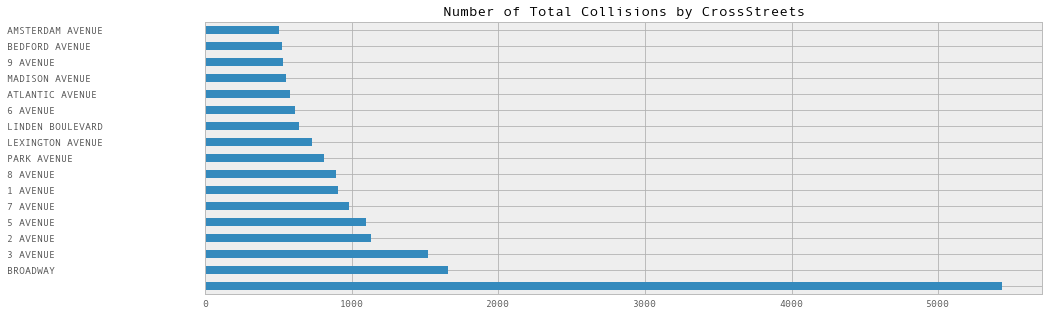

In [60]:
df2.CROSS_STREET_NAME[(df2.NO_OF_PERSONS_KILLED >0) | (df2.NO_OF_PERSONS_INJURED >0) ].value_counts()[df2.CROSS_STREET_NAME[(df2.NO_OF_PERSONS_KILLED >0) | (df2.NO_OF_PERSONS_INJURED >0) ].value_counts()>500].plot(kind='barh')
plt.title("Number of Total Collisions by CrossStreets")
plt.savefig("/Users/sandippalit/downloads/png8.png")

**'BROADWAY'** cross-street has **most collisions** recorded followed by **'3 AVENUE'**and **'2 AVENUE'**.


In [62]:
df2.groupby(['ON_STREET_NAME', 'CROSS_STREET_NAME'])[["INCIDENTS", "NO_OF_PERSONS_INJURED", "NO_OF_PERSONS_KILLED"]].sum().sort_values("NO_OF_PERSONS_INJURED", ascending=False).head(5)


,,INCIDENTS,NO_OF_PERSONS_INJURED,NO_OF_PERSONS_KILLED
ON_STREET_NAME,CROSS_STREET_NAME,,,
,,24992,5189,11
ROCKAWAY BOULEVARD,BROOKVILLE BOULEVARD,351,191,3
164 STREET,GRAND CENTRAL PARKWAY,166,115,0
PENNSYLVANIA AVENUE,LINDEN BOULEVARD,263,96,0
FLATBUSH AVENUE,EMPIRE BOULEVARD,213,95,0


In [63]:
cross_incidents = df2.groupby(['LONGITUDE', 'LATITUDE'])[["INCIDENTS"]].sum().sort_values("INCIDENTS", ascending=False)

cross_incidents.head(7)

,,INCIDENTS
LONGITUDE,LATITUDE,
-73.984529,40.696035,673
-73.964314,40.760601,540
-73.989792,40.757232,485
-73.896853,40.675736,479
-73.890623,40.658578,464
-73.994040,40.720321,418
-73.870369,40.733497,415


In [66]:
cross_kills = df2.groupby(['LONGITUDE', 'LATITUDE'])[["NO_OF_PERSONS_KILLED"]].sum().sort_values("NO_OF_PERSONS_KILLED", ascending=False)

cross_kills.head(3)

,,NO_OF_PERSONS_KILLED
LONGITUDE,LATITUDE,
-74.010730,40.729046,8
-73.813334,40.697204,5
-73.900874,40.779280,4


In [67]:
gps1 = [[cross_kills.index[x][1], cross_kills.index[x][0]]  for x in range(40)]

gps1


[[40.729046000000004, -74.010730000000009],
 [40.697204499999998, -73.813334099999992],
 [40.779279799999998, -73.900874200000004],
 [40.762978000000004, -73.831980000000001],
 [40.794233300000002, -73.946946199999999],
 [40.642004100000001, -73.898829599999999],
 [40.597682499999998, -73.966849900000014],
 [40.844607600000003, -73.903471499999995],
 [40.8387216, -73.913770599999992],
 [40.744509399999998, -73.766098599999992],
 [40.703158700000003, -73.965874099999994],
 [40.693662500000002, -73.852163900000008],
 [40.738262400000004, -73.798938299999989],
 [40.730365999999997, -73.913880000000006],
 [40.719125599999998, -73.791399299999995],
 [40.7563818, -73.964323700000008],
 [40.6902385, -73.994360299999997],
 [40.742162700000002, -73.804431700000009],
 [40.742908200000002, -73.839308200000005],
 [40.645703600000004, -73.901432999999997],
 [40.679794100000002, -73.809813500000004],
 [40.769997600000004, -73.915817799999999],
 [40.6655218, -73.744656800000001],
 [40.716194000000002

In [75]:
df2.groupby(['ON_STREET_NAME', 'CROSS_STREET_NAME'])[["NO_OF_PERSONS_KILLED"]].sum().sort_values("NO_OF_PERSONS_KILLED", ascending=False).head(5)


,,NO_OF_PERSONS_KILLED
ON_STREET_NAME,CROSS_STREET_NAME,
,,11
WEST STREET,WEST HOUSTON STREET,8
94 AVENUE,VAN WYCK EXPRESSWAY,5
19 AVENUE,37 STREET,4
VICTORY BOULEVARD,TRAVIS AVENUE,3


In [77]:
df3 = df2.groupby(['ON_STREET_NAME', 'CROSS_STREET_NAME'])[["INCIDENTS"]].sum().sort_values("INCIDENTS", ascending=False).head(10)
df3

INCIDENTS
ON_STREET_NAME                   CROSS_STREET_NAME                          
                                                                       24992
WEST 42 STREET                   8 AVENUE                                408
FLATBUSH AVENUE                  GRAND ARMY PLAZA                        400
EAST 59 STREET                   2 AVENUE                                359
ROCKAWAY BOULEVARD               BROOKVILLE BOULEVARD                    351
TILLARY STREET                   FLATBUSH AVENUE EXTENSION               343
EAST 57 STREET                   3 AVENUE                                326
                                 2 AVENUE                                317
WEST 34 STREET                   7 AVENUE                                306
EAST 36 STREET                   2 AVENUE                                299


** WEST STREET WEST HOUSTON STREET** Crossing has highest number of fatality recorded. 
** WEST 42 STREET-8 AVENUE** Crossing has highest number of collision incidents.

## Analysis of Collisions by Zip Code

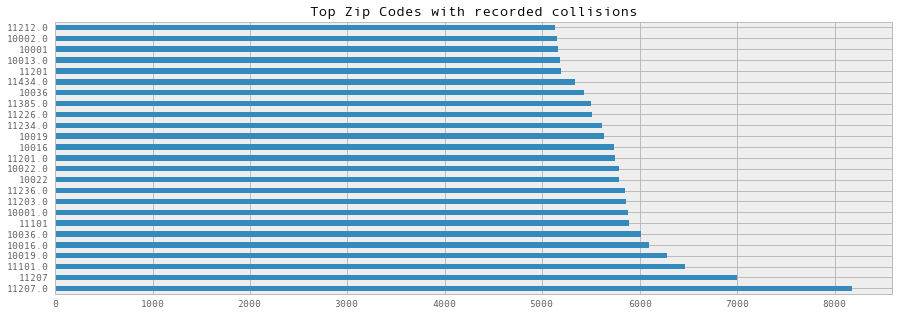

In [79]:

df2["ZIP_Code"].value_counts()[df2["ZIP_Code"].value_counts()>5000].plot(kind='barh')
plt.title("Top Zip Codes with recorded collisions")
plt.show()

plt.savefig("/Users/sandippalit/downloads/png9.png")

** Top 5 Zip Codes with highest occurence of Collision : 11207, 11101,10019,10016 and 10036. **

# Analysis of Contributing Factors for Collisions

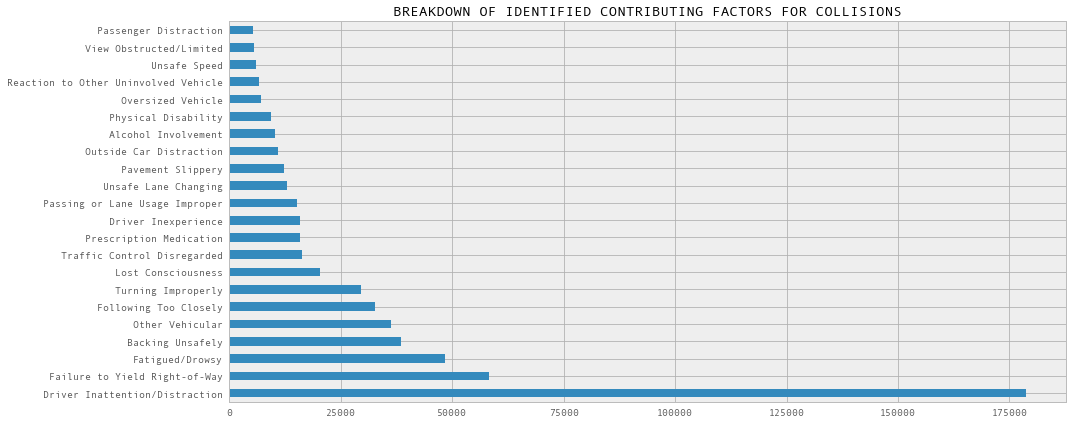

In [82]:
df2["CONTRIBUTING_FACTOR_1"][df2["CONTRIBUTING_FACTOR_1"] != 'Unspecified'] .value_counts()[df2["CONTRIBUTING_FACTOR_1"].value_counts()>5000].plot(kind='barh', figsize = (15,7))
plt.title("BREAKDOWN OF IDENTIFIED CONTRIBUTING FACTORS FOR COLLISIONS")
plt.show()
plt.savefig("/Users/sandippalit/downloads/png10.png")

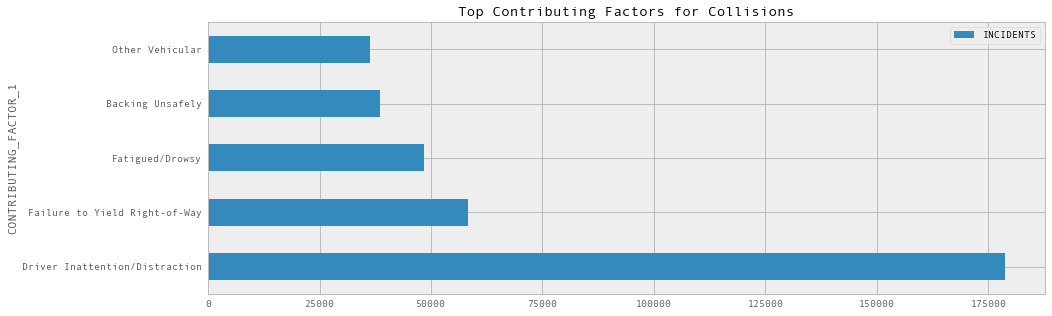

In [83]:
df2[df2['CONTRIBUTING_FACTOR_1'] != "Unspecified" ].groupby(['CONTRIBUTING_FACTOR_1'])[['INCIDENTS']].sum().sort_values("INCIDENTS", ascending=False).head().plot(kind='barh')

plt.title("Top Contributing Factors for Collisions")
plt.savefig("/Users/sandippalit/downloads/png33.png")

** Top 3 contributing factors for collisions are : 1. Driver Inattention/Distraction, 2. Fatigued/Drowsy and 3. Failure to Yield Right of Way.**

In [84]:
df2.groupby("CONTRIBUTING_FACTOR_1")[["NO_OF_PERSONS_INJURED", "NO_OF_PERSONS_KILLED"]].sum().sort_values("NO_OF_PERSONS_INJURED",ascending=False)

,NO_OF_PERSONS_INJURED,NO_OF_PERSONS_KILLED
CONTRIBUTING_FACTOR_1,,
Unspecified,138108,643
Driver Inattention/Distraction,46567,159
Failure to Yield Right-of-Way,23882,107
Fatigued/Drowsy,12520,3
Following Too Closely,10144,17
Traffic Control Disregarded,9801,150
Other Vehicular,6988,19
Physical Disability,5759,28
Alcohol Involvement,4691,44


# Analysis of Collisions by Times

In [85]:
df.groupby(['DAY OF WEEK', 'TIMEBRACKET'])[["INCIDENTS", "NUMBER OF PERSONS INJURED", "NUMBER OF PERSONS KILLED"]].sum().sort_values("NUMBER OF PERSONS INJURED", ascending=False).head()

,,INCIDENTS,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
DAY OF WEEK,TIMEBRACKET,,,
Friday,Early Afternoon,77183,17568,63
Wednesday,Early Afternoon,71971,16459,50
Tuesday,Early Afternoon,72039,16459,53
Thursday,Early Afternoon,71660,16385,36
Monday,Early Afternoon,69531,16297,53


** Friday Early Afternoon ** has most number of collision incidents closely followed by Wednesday and Tuesday - All Early Afternoon.

In [86]:
df.groupby(['DAY OF WEEK', 'TIMEBRACKET'])[["INCIDENTS", "NUMBER OF PERSONS INJURED", "NUMBER OF PERSONS KILLED"]].sum().sort_values("NUMBER OF PERSONS INJURED", ascending=True).head()

,,INCIDENTS,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
DAY OF WEEK,TIMEBRACKET,,,
Tuesday,Early Morning,9868,2976,36
Wednesday,Early Morning,10408,3276,41
Thursday,Early Morning,11365,3384,41
Monday,Early Morning,11869,3921,41
Friday,Early Morning,14057,4331,36


**Early Mornings** has lowest number of collision incidents.All Top 5 lowest recorded collision time brackets are in early morning. **Tuesday early morning"" in particular has lowest number of incidents across all time brackets for 5 years.

In [87]:
df.groupby(['DAY OF WEEK', 'TIMEBRACKET'])[["INCIDENTS","NUMBER OF PERSONS INJURED", "NUMBER OF PERSONS KILLED"]].sum()


INCIDENTS  NUMBER OF PERSONS INJURED  \
DAY OF WEEK TIMEBRACKET                                             
Friday      Early Morning        14057                       4331   
            Morning              53651                      11788   
            Early Afternoon      77183                      17568   
            Evening              47761                      13968   
Monday      Early Morning        11869                       3921   
            Morning              53598                      11611   
            Early Afternoon      69531                      16297   
            Evening              37209                      11284   
Saturday    Early Morning        23323                       7862   
            Morning              32685                       7668   
            Early Afternoon      61066                      15146   
            Evening              42807                      13601   
Sunday      Early Morning        25595                       9212   
            Morning              25797                       6655   
            Early Afternoon      55050                      14387   
            Evening              35720                      11839   
Thursday    Early Morning        11365                       3384   
            Morning              54037                      11784   
            Early Afternoon      71660                      16385   
            Evening              43337                      12438   
Tuesday     Early Morning         9868                       2976   
            Morning              55756                      12216   
            Early Afternoon      72039                      16459   
            Evening              40627                      12169   
Wednesday   Early Morning        10408                       3276   
            Morning              53434                      11731   
            Early Afternoon      71971                      16459   
            Evening              41802                      12206   

                             NUMBER OF PERSONS KILLED  
DAY OF WEEK TIMEBRACKET                                
Friday      Early Morning                          36  
            Morning                                42  
            Early Afternoon                        63  
            Evening                                79  
Monday      Early Morning                          41  
            Morning                                55  
            Early Afternoon                        53  
            Evening                                71  
Saturday    Early Morning                          76  
            Morning                                28  
            Early Afternoon                        51  
            Evening                                57  
Sunday      Early Morning                         101  
            Morning                                26  
            Early Afternoon                        43  
            Evening                                55  
Thursday    Early Morning                          41  
            Morning                                41  
            Early Afternoon                        36  
            Evening                                64  
Tuesday     Early Morning                          36  
            Morning                                51  
            Early Afternoon                        53  
            Evening                                52  
Wednesday   Early Morning                          41  
            Morning                                34  
            Early Afternoon                        50  
            Evening                                65

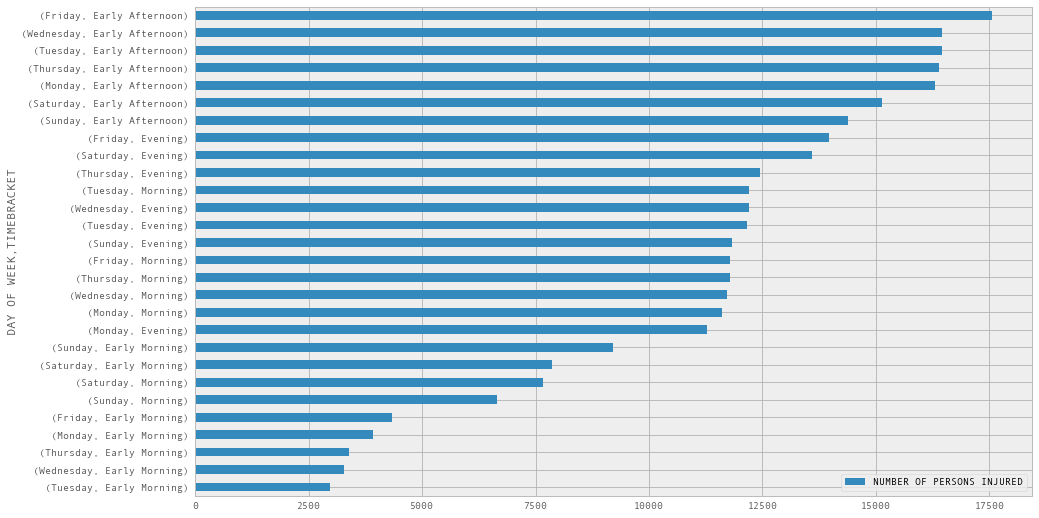

In [88]:
df.groupby(['DAY OF WEEK', 'TIMEBRACKET'])[['NUMBER OF PERSONS INJURED']].sum().sort_values('NUMBER OF PERSONS INJURED', ascending= True).plot(kind='barh', figsize = (15,9))

plt.savefig("/Users/sandippalit/downloads/png11.png")

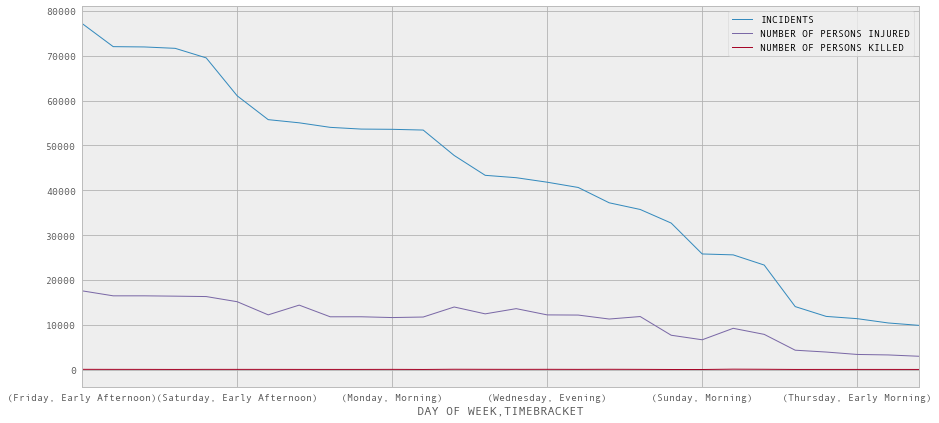

In [89]:
df.groupby(['DAY OF WEEK', 'TIMEBRACKET'])[["INCIDENTS", "NUMBER OF PERSONS INJURED", "NUMBER OF PERSONS KILLED"]].sum().sort_values("INCIDENTS", ascending=False).plot(figsize = (15,7))

plt.savefig("/Users/sandippalit/downloads/png12.png")

# What are the most contributing factors in different times of the day?

## Driver inattention rules

However, unlike other parts of the day, Alcohol Involvement is the second highest contributor for accidents during the night

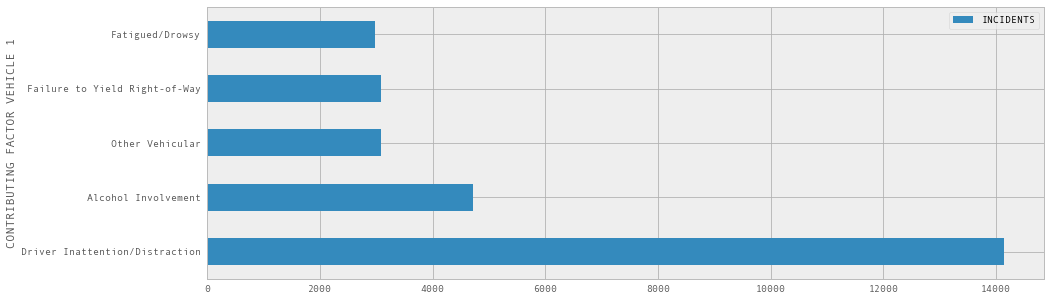

In [90]:
df[(df['TIMEBRACKET'] == "Early Morning") & (df['CONTRIBUTING FACTOR VEHICLE 1'] != "Unspecified") ].groupby(['CONTRIBUTING FACTOR VEHICLE 1'])[['INCIDENTS']].sum().sort_values("INCIDENTS", ascending=False).head().plot(kind='barh')


# When do most Alcohol related incidents happen? 

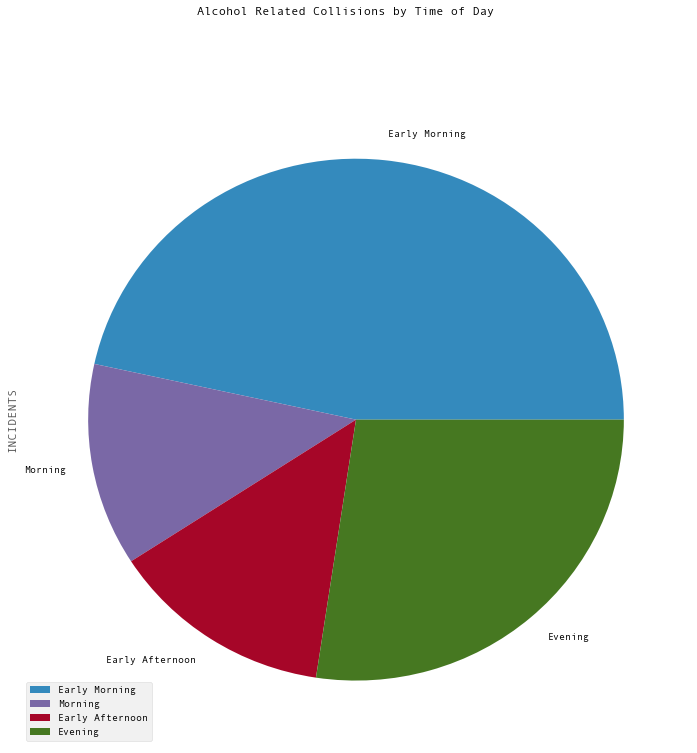

In [91]:
df[df['CONTRIBUTING FACTOR VEHICLE 1'] == "Alcohol Involvement"] .groupby(['TIMEBRACKET'])[['INCIDENTS']].sum().plot.pie(figsize=(12, 12),subplots=True, title = "Alcohol Related Collisions by Time of Day")

plt.savefig("/Users/sandippalit/downloads/png28.png")


In [92]:
df.index

RangeIndex(start=0, stop=1208810, step=1)

# Do accidents causes change with time of day? 


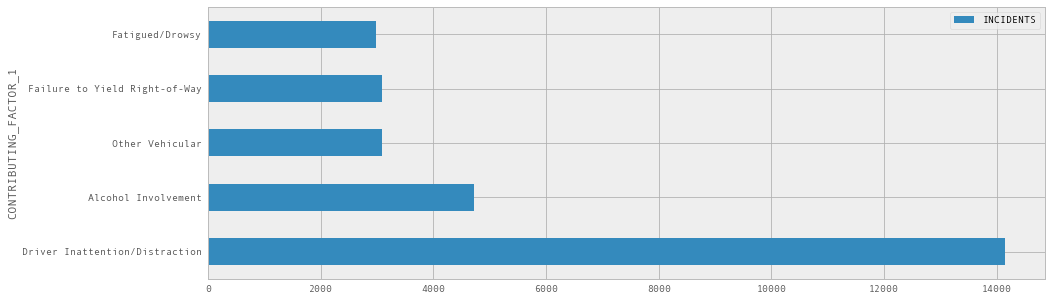

In [113]:
df2[(df2['TIMEBRACKET'] == "Early Morning") & (df2['CONTRIBUTING_FACTOR_1'] != "Unspecified") ].groupby(['CONTRIBUTING_FACTOR_1'])[['INCIDENTS']].sum().sort_values("INCIDENTS", ascending=False).head().plot(kind='barh')

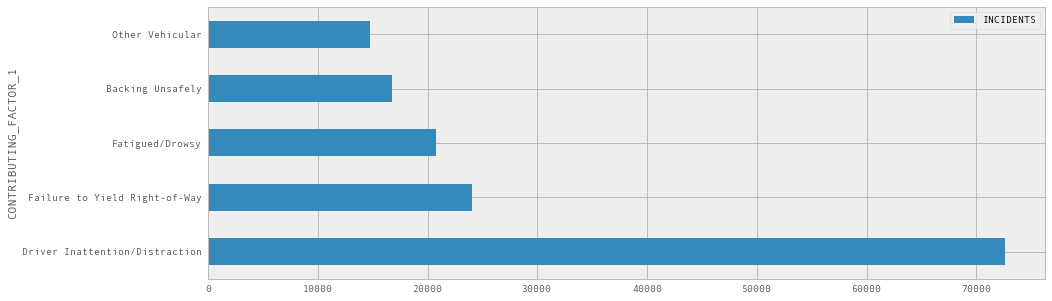

In [94]:
df2[(df2['TIMEBRACKET'] == "Early Afternoon") & (df2['CONTRIBUTING_FACTOR_1'] != "Unspecified") ].groupby(['CONTRIBUTING_FACTOR_1'])[['INCIDENTS']].sum().sort_values("INCIDENTS", ascending=False).head().plot(kind='barh')

## When do Accidents happen most?


In [95]:
part_of_day = df.groupby(['TIMEBRACKET'])[["INCIDENTS", "NUMBER OF PERSONS INJURED", "NUMBER OF PERSONS KILLED"]].sum().sort_values("INCIDENTS", ascending=False)
part_of_day

,INCIDENTS,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED
TIMEBRACKET,,,
Early Afternoon,478500,112701,349
Morning,328958,73453,277
Evening,289263,87505,443
Early Morning,106485,34962,372


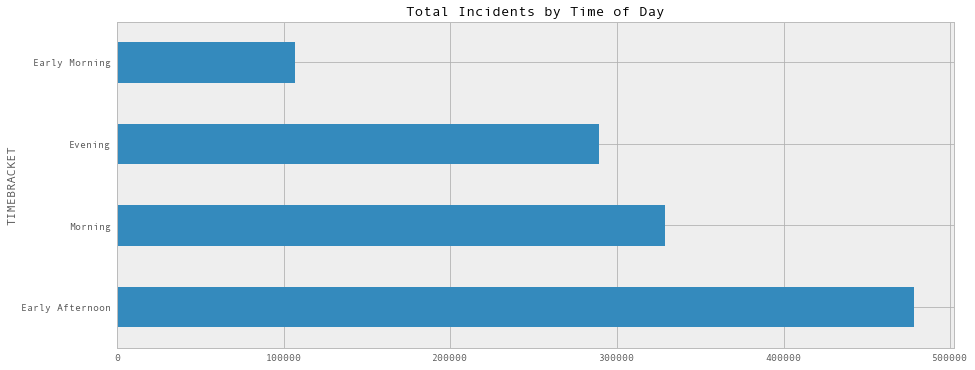

In [96]:
part_of_day['INCIDENTS'].plot(kind="barh", figsize = (15,6))
plt.title("Total Incidents by Time of Day")
plt.savefig("/Users/sandippalit/downloads/png15.png")

## In what part of the day are accidents more fatal?

In [97]:
part_of_day['Fatality Ratio'] = part_of_day['NUMBER OF PERSONS KILLED']/ part_of_day['INCIDENTS'] * 100
part_of_day

,INCIDENTS,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,Fatality Ratio
TIMEBRACKET,,,,
Early Afternoon,478500,112701,349,0.072936
Morning,328958,73453,277,0.084205
Evening,289263,87505,443,0.153148
Early Morning,106485,34962,372,0.349345


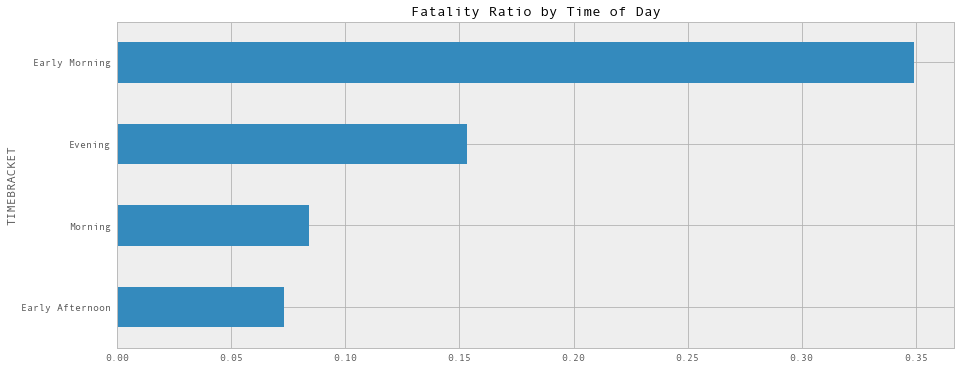

In [98]:
part_of_day['Fatality Ratio'].plot(kind="barh", figsize = (15,6))
plt.title("Fatality Ratio by Time of Day")
plt.savefig("/Users/sandippalit/downloads/png16.png")

## Important Insight:
#### Early Afternoon most incidents (of course because of more traffic) but least deadly
#### Early Morning least incidents but most deadly

## What are the most common causes by Borough?

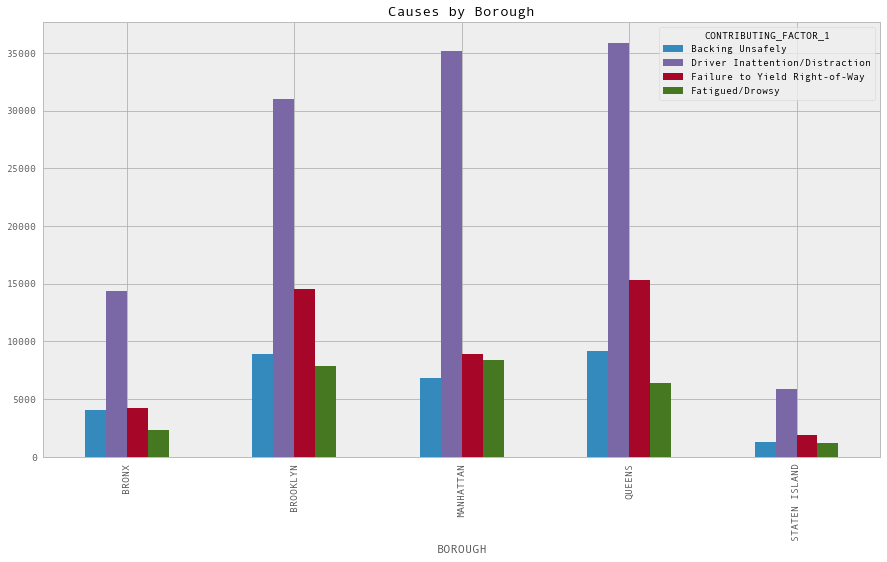

In [114]:
most_causes = [df2["CONTRIBUTING_FACTOR_1"].value_counts()[0:6].index[x] for x in range(1,6)]

borough_temp = df2[(df2["CONTRIBUTING_FACTOR_1"] == most_causes[0]) |\
    (df2["CONTRIBUTING_FACTOR_1"] == most_causes[1]) |\
    (df2["CONTRIBUTING_FACTOR_1"] == most_causes[2]) |\
    (df2["CONTRIBUTING_FACTOR_1"] == most_causes[3]) ]

borough_causes = borough_temp.groupby('BOROUGH')['CONTRIBUTING_FACTOR_1'].value_counts().sort_values(ascending=False)
borough_causes_un = borough_causes.unstack("CONTRIBUTING_FACTOR_1")
borough_causes_un.plot(kind="bar", figsize= (15,8), title = "Causes by Borough")
plt.savefig("/Users/sandippalit/downloads/png199.png")

## Which boroughs are in bad need of Roads Maintenance?

In [115]:
slippery = df2[df2["CONTRIBUTING_FACTOR_1"] == 'Pavement Slippery']
slippery.groupby("BOROUGH")['INCIDENTS'].sum()

BOROUGH
BRONX            1252
BROOKLYN         2238
MANHATTAN        1205
QUEENS           2423
STATEN ISLAND     674
Name: INCIDENTS, dtype: int64

## In which Borough is cycling a Bad Idea?

In [116]:
cycling = df2.groupby("BOROUGH")[["NO_OF_CYCLIST_INJURED", "INCIDENTS"]].sum().sort_values("NO_OF_CYCLIST_INJURED", ascending=False)
cycling["cyclist_collision_ratio"] = cycling["NO_OF_CYCLIST_INJURED"] / cycling["INCIDENTS"] * 100
cycling['per_cycl'] = ["{0:.2f}%".format(val) for val in cycling['cyclist_collision_ratio']]
cycling.drop("cyclist_collision_ratio",axis=1, inplace=True)
cycling

,NO_OF_CYCLIST_INJURED,INCIDENTS,per_cycl
BOROUGH,,,
BROOKLYN,8173,266069,3.07%
MANHATTAN,6194,217547,2.85%
QUEENS,4070,226272,1.80%
BRONX,1871,115422,1.62%
STATEN ISLAND,224,39730,0.56%


## Pie Charts

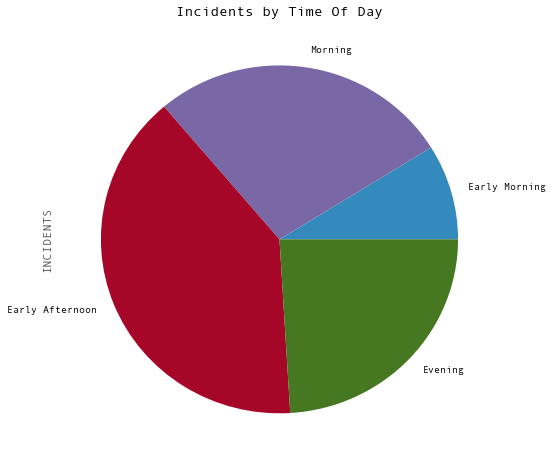

In [117]:
df2.groupby("TIMEBRACKET")["INCIDENTS"].sum().plot.pie(figsize=(8, 8), title = "Incidents by Time Of Day")
plt.savefig("/Users/sandippalit/downloads/png18.png")


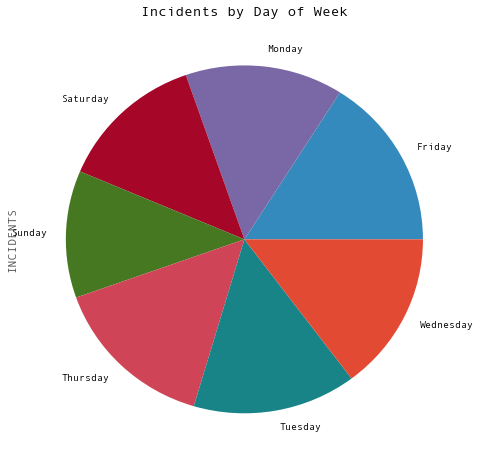

In [118]:
df2.groupby("DAY_OF_WEEK")["INCIDENTS"].sum().plot.pie(figsize=(8, 8), title = "Incidents by Day of Week")
plt.savefig("/Users/sandippalit/downloads/png19.png")

## The highest days in incidents all happen during winter

In [109]:
df2.groupby("DATE")["INCIDENTS"].sum().sort_values(ascending=False).head(5)

DATE
2014-01-21    1161
2017-12-15     994
2017-05-19     964
2015-01-18     961
2014-02-03     960
Name: INCIDENTS, dtype: int64